In [8]:
!pip3 install contextily

import networkx as nx
import matplotlib.pyplot as plt
import contextily as ctx

# Define cities with coordinates (latitude, longitude)
city_coordinates = {
    "Valencia": (39.4699, -0.3763),
    "Barcelona": (41.3851, 2.1734),
    "Madrid": (40.4168, -3.7038),
    "Alicante": (38.3452, -0.4810),
    "Seville": (37.3886, -5.9823),
    "Zaragoza": (41.6488, -0.8891),
    "Toledo": (39.8628, -4.0273)
}

# Define city connections
city_connections = {
    "Valencia": ["Barcelona", "Madrid", "Alicante"],
    "Barcelona": ["Valencia", "Zaragoza"],
    "Madrid": ["Valencia", "Seville", "Toledo"],
    "Alicante": ["Valencia"],
    "Seville": ["Madrid"],
    "Zaragoza": ["Barcelona"],
    "Toledo": ["Madrid"]
}


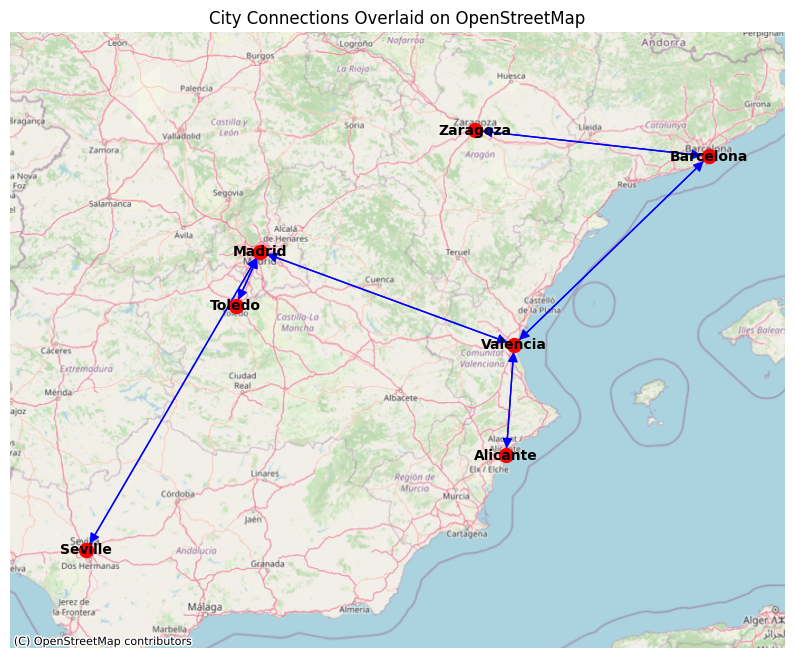

In [9]:
# Create a NetworkX graph
city_graph = nx.DiGraph()

# Add edges
for city, neighbors in city_connections.items():
    for neighbor in neighbors:
        city_graph.add_edge(city, neighbor)

# Plot the graph on a basemap
fig, ax = plt.subplots(figsize=(10, 8))

# Extract positions for nodes
pos = {city: (lon, lat) for city, (lat, lon) in city_coordinates.items()}

# Plot the graph nodes and edges
nx.draw(
    city_graph, pos, ax=ax, with_labels=True, node_size=100, node_color="red",
    font_size=10, font_weight="bold", edge_color="blue", arrowsize=15
)

# Set plot limits based on city coordinates
all_lats = [lat for lat, lon in city_coordinates.values()]
all_lons = [lon for lat, lon in city_coordinates.values()]
ax.set_xlim(min(all_lons) - 1, max(all_lons) + 1)
ax.set_ylim(min(all_lats) - 1, max(all_lats) + 1)

# Add a basemap with OpenStreetMap
ctx.add_basemap(ax, crs="EPSG:4326", source=ctx.providers.OpenStreetMap.Mapnik)

# Final adjustments
plt.title("City Connections Overlaid on OpenStreetMap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(False)
plt.show()